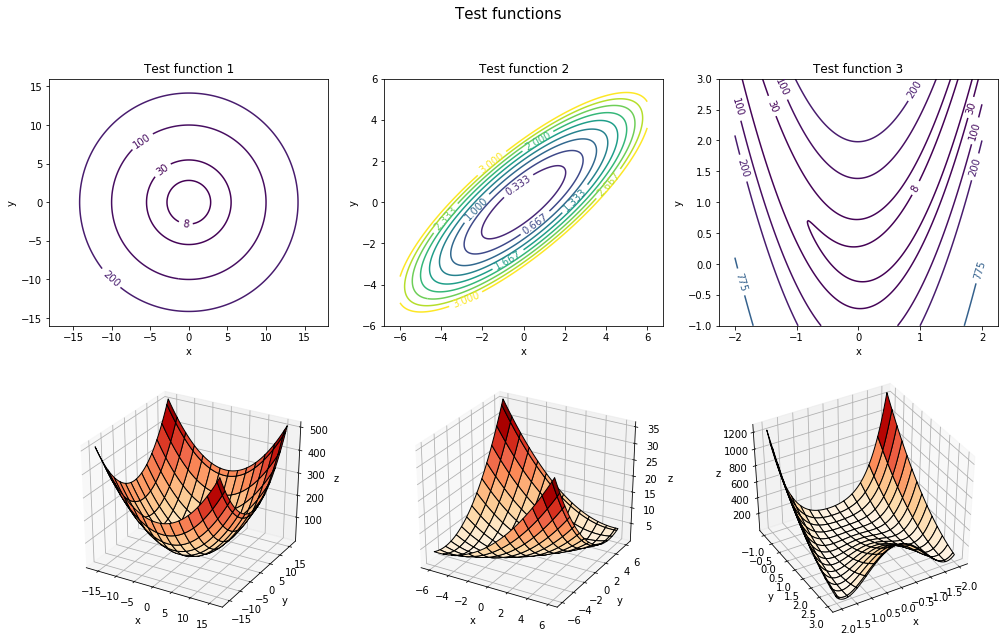

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

#####################################################
# 최적화 실습에 쓸 예제 함수 3개
# Test function 1 : function = f_1, derivative = df_1
# Test function 2 : function = f_2, derivative = df_2
# Test function 3 : function = f_2, derivative = df_3
#
# 각 함수를 리스트로 묶어서 전역변수로 준비
# F  = [f_1, f_2, f_3]
# DF = [df_1, df_2, df_3]
#
# 각 함수의 최적점도 미리 리스트로 만들어 둔다. 
# OPTIMS = [(0,0), (0,0), (2,4)]
#####################################################

def f_1(x) :
    return   x[0]**2 + x[1]**2

def df_1(x):
    dx0 = 2*x[0]
    dx1 = 2*x[1]
    return np.array([dx0, dx1])

def f_2(x, a):
    # https://www.desmos.com/calculator/42lngkxil6
    # a = -0.7
    return ( (x[0]*np.cos(a) - x[1]*np.sin(a))**2 / 20 
            + (x[0]*np.sin(a) + x[1]*np.cos(a))**2 / 2 )

def df_2(x, a):
    #a = -0.7
    dx0 = ( (1/10)*(x[0]*np.cos(a) - x[1]*np.sin(a))*np.cos(a) 
           + (x[0]*np.sin(a) + x[1]*np.cos(a))*np.sin(a) )
    
    dx1 = ( -(1/10)*(x[0]*np.cos(a) - x[1]*np.sin(a))*np.sin(a) 
           + (x[0]*np.sin(a) + x[1]*np.cos(a))*np.cos(a) )
    
    return np.array([dx0, dx1])

def f_3(x) :
    """
    Rosenbrock function, example 11.8 from [arora]
    """
    return 50*(x[1]-x[0]**2)**2 + (2-x[0])**2

def df_3(x) :  
    dx0 = -200*x[0]*(x[1]-x[0]**2)-2*(2-x[0])
    dx1 = 100*(x[1]-x[0]**2)
    return np.array([dx0, dx1])

F  = [f_1, f_2, f_3]
DF = [df_1, df_2, df_3]
OPTIMS = [(0,0), (0,0), (2,4)]

###################################################################


x1 = np.linspace(-16, 16, 200)
y1 = np.linspace(-16, 16, 200)

x2 = np.linspace(-6, 6, 200)
y2 = np.linspace(-6, 6, 200)

x3 = np.linspace(-2, 2, 200)
y3 = np.linspace(-1, 3, 200)

X1, Y1 = np.meshgrid(x1,y1)
X2, Y2 = np.meshgrid(x2,y2)
X3, Y3 = np.meshgrid(x3,y3)

Zs = [ f_1([X1,Y1]),  f_2([X2,Y2], -0.7),  f_3([X3,Y3]) ]

# Basic contour plot
levels1 = np.linspace(8, 20, 1)
levels2 = np.linspace(30, 100, 2)
levels3 = np.linspace(200, 2500, 5)
LEVELS = ( np.concatenate((levels1, levels2, levels3)), 
           np.linspace(0, 3, 10),
           np.concatenate((levels1, levels2, levels3)) )

plt.rcParams["figure.figsize"] = (17,10)

fig = plt.figure()
ax_11 =  fig.add_subplot(231)
ax_12 =  fig.add_subplot(232)
ax_13 =  fig.add_subplot(233)
ax_21 =  fig.add_subplot(234, projection='3d')
ax_22 =  fig.add_subplot(235, projection='3d')
ax_23 =  fig.add_subplot(236, projection='3d')

CS = ax_11.contour(X1, Y1, Zs[0], levels=LEVELS[0], cmap='viridis')
ax_11.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
ax_11.axis('equal')
ax_11.set_xlabel('x')
ax_11.set_ylabel('y')
ax_11.set_title('Test function 1')

CS = ax_12.contour(X2, Y2, Zs[1], levels=LEVELS[1], cmap='viridis')
ax_12.clabel(CS, CS.levels,  fmt='%1.3f', inline=True, fontsize=10)
ax_12.axis('equal')
ax_12.set_xlabel('x')
ax_12.set_ylabel('y')
ax_12.set_title('Test function 2')

CS =ax_13.contour(X3, Y3, Zs[2], levels=LEVELS[2], cmap='viridis')
ax_13.clabel(CS, CS.levels,  fmt='%1.0f', inline=True, fontsize=10)
ax_13.axis('equal')
ax_13.set_xlabel('x')
ax_13.set_ylabel('y')
ax_13.set_title('Test function 3')

ax_21.plot_surface(X1, Y1, Zs[0], rstride=15, cstride=15, cmap=plt.cm.OrRd, edgecolor="k")
ax_21.set_xlabel('x')
ax_21.set_ylabel('y')
ax_21.set_zlabel('z')

ax_22.plot_surface(X2, Y2, Zs[1], rstride=15, cstride=15, cmap=plt.cm.OrRd, edgecolor="k")
ax_22.set_xlabel('x')
ax_22.set_ylabel('y')
ax_22.set_zlabel('z')

ax_23.plot_surface(X3, Y3, Zs[2], rstride=15, cstride=15, cmap=plt.cm.OrRd, edgecolor="k")
ax_23.set_xlabel('x')
ax_23.set_ylabel('y')
ax_23.set_zlabel('z')
ax_23.view_init(40, 60)

plt.suptitle("Test functions", fontsize=15)

plt.show()

In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>